In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Modeling

## v1. Only my data

* Lux, all-lane, all-tier

In [2]:
from package import data_preprocessing
from package import draw_graph
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict

In [3]:
example_1 = data_preprocessing.dataset("Lux")
example_1.head(10)

,rank,lane,kills,deaths,assists,cs,barons,dragons,heralds,towers,win
0,DIAMOND-I,UTILITY,5,7,13,19,2,2,0,9,True
1,DIAMOND-I,UTILITY,1,4,13,17,0,1,1,6,True
2,DIAMOND-I,UTILITY,4,2,9,16,0,2,1,3,True
3,DIAMOND-I,UTILITY,1,9,0,6,0,0,1,2,False
4,DIAMOND-II,UTILITY,1,4,10,24,0,0,0,0,False
5,DIAMOND-II,UTILITY,6,10,25,33,0,1,1,1,False
6,DIAMOND-II,UTILITY,1,11,3,15,0,1,0,1,False
7,DIAMOND-II,UTILITY,6,10,3,16,0,0,0,2,False
8,DIAMOND-II,UTILITY,5,7,8,32,0,0,0,1,False
9,DIAMOND-III,UTILITY,4,7,20,31,0,3,1,8,True


In [4]:
X_train, X_test, y_train, y_test = data_preprocessing.tt_split(example_1)

lrg_onlyme_v1 = LogisticRegression(random_state=42)
lrg_onlyme_v1.fit(X_train, y_train)

y_scores = cross_val_predict(lrg_onlyme_v1, X_train, y_train, cv=3, method='decision_function')

d:\PythonWorkspace\gitrepo\Lux_project\model\package\draw_graph.py:13: RuntimeWarning: divide by zero encountered in true_divide
  f1_scores = np.true_divide(2, np.true_divide(1, precisions) + np.true_divide(1, recalls))


Precision: 0.9135338345864662         
Recall: 0.9135338345864662         
Threshold: 0.045596884865357845


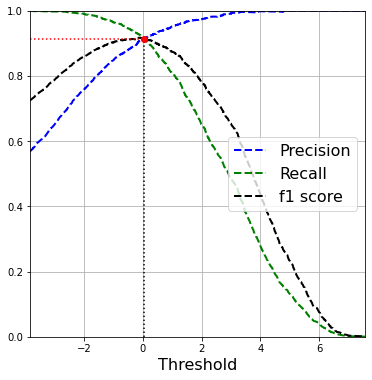

In [5]:
draw_graph.plot_pr_vs_threshold(y_train, y_scores)

AUC score: 0.9725698038795738


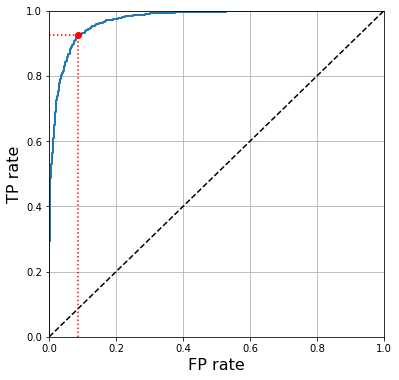

In [6]:
draw_graph.plot_roc_curve(y_train, y_scores)
